<a id='TOC'></a>

# Project: Investigate Airbnb dataset of Boston and Seattle. 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#business_understanding">Business Understanding</a></li>
<li><a href="#data_understanding">Data Understanding</a></li>
<li><a href="#data_preparation">Data Preparation</a></li>
<li><a href="#modeling">Modeling</a></li>    
<li><a href="#results_evaluation">Results Evaluation</a></li>
<li><a href="#deploy_solution">Deployment</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Airbnb is a publicly listed company with focus on Lodging industry. It is headquartered in San Francisco but has presence in multiple countries. 
<br>
It works in online marketplace for rental activities.
<br><br>
Dataset includes 2 cities; Boston and Seattle. Files for each city contain 3 csv (comma separated variable) files containing rental availability calendar, available listings and reviews.
<br><br>
Objective is to discover actionable insight from the available data so that stakeholders can use that information and strategize business decisions.


<li><a href="#TOC">Back To Table Of Contents</a></li>

Import general packages and graphing capabilities which will be used in all datasets.

In [556]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

<a id='business_understanding'></a>
## Business Understanding

Business model of Airbnb is based on revenue earning through comission for providing rental listings to end users. people willing to rent put up the listing/s on Airbnb website and customers book it through Airbnb. 
<br><br>
Based on the data available objective of this analysis is going to be to discover factors behind several situations; e.g. which neighborhoods are always overbooked? what exactly causes that? is it because of the surrounding area or the rental facilities are very good? knowledge about these things can tell Airbnb how they can approach the situation. Maybe the listings are not very good, or the service provided is not upto the mark. whatever the reason understanding what are the environmental factors is the first step towards the improvement.

<li><a href="#TOC">Back To Table Of Contents</a></li>

<a id='data_understanding'></a>
## Data Understanding

Amongst many Objectives of this stage prime one is to get familiar with the data. The familiarity has potential to discovering features of interest for mining activities.


Import the data

In [4]:
df_boston_calendar = pd.read_csv('Boston-calendar.csv')  
df_boston_listings =  pd.read_csv('Boston-listings.csv')
df_boston_reviews = pd.read_csv('Boston-reviews.csv')
df_seattle_calendar = pd.read_csv('Seattle-calendar.csv')
df_seattle_listings = pd.read_csv('Seattle-listings.csv')
df_seattle_reviews = pd.read_csv('Seattle-reviews.csv')

Making backup of all dataframes 

In [5]:
backup_df_boston_calendar = df_boston_calendar.copy()
backup_df_boston_listings =  df_boston_listings.copy()
backup_df_boston_reviews = df_boston_reviews.copy()
backup_df_seattle_calendar = df_seattle_calendar.copy()
backup_df_seattle_listings = df_seattle_listings.copy()
backup_df_seattle_reviews = df_seattle_reviews.copy()

FIrst we will focus on dataframes ob Boston dataframes


Checkout sample lines of each dataframe

In [6]:
df_boston_calendar.sample(7)

,listing_id,date,available,price
817148,10231714,2017-07-24,f,NaN
1116715,4435883,2016-12-27,f,NaN
674849,12648403,2016-10-11,f,NaN
608251,11618815,2017-03-28,t,$99.00
942375,13265095,2016-10-30,f,NaN
83440,1631942,2017-08-02,t,$126.00
1063415,13574652,2017-03-19,f,NaN


In [7]:
df_boston_calendar.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [8]:
df_boston_listings.sample(7)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1032,6810723,https://www.airbnb.com/rooms/6810723,20160906204935,2016-09-07,"Columbus By Maverick, TwentyThree","The unit is stylishly designed for comfort, va...",The studio has a private (not shared) bathroom...,"The unit is stylishly designed for comfort, va...",none,Bordering the neighborhoods of the South End a...,...,NaN,f,NaN,NaN,f,strict,f,f,50,NaN
2962,1332786,https://www.airbnb.com/rooms/1332786,20160906204935,2016-09-07,"Cozy Sunporch, Quick Downtown",We've converted the first floor sun porch into...,We live in an 18 room 160 year old house that ...,We've converted the first floor sun porch into...,none,"A diverse, residential neighborhood with lots ...",...,10.0,f,NaN,NaN,t,flexible,f,f,7,2.82
405,13968660,https://www.airbnb.com/rooms/13968660,20160906204935,2016-09-07,Charming private bedroom with bath,This great private bedroom is apart of a moder...,Great apartment in a great location. The very ...,This great private bedroom is apart of a moder...,none,"Great environment with lots of restaurants, ba...",...,10.0,f,NaN,NaN,f,strict,f,f,1,1.00
3455,5085125,https://www.airbnb.com/rooms/5085125,20160906204935,2016-09-07,Cozy Private AC Bedroom in Boston,"A simple, cozy room in a two-bedroom bedroom a...",You will have a private room with a comfortabl...,"A simple, cozy room in a two-bedroom bedroom a...",none,"Allston Village, which historically developed ...",...,9.0,f,NaN,NaN,t,strict,f,f,3,6.10
3056,10053928,https://www.airbnb.com/rooms/10053928,20160906204935,2016-09-07,Beautifully Furnished 1BR Lux Apt.,Luxury high-rise apt. with unparalleled amenit...,Our luxury high-rise apt. is conveniently loca...,Luxury high-rise apt. with unparalleled amenit...,none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,136,NaN
2084,8302844,https://www.airbnb.com/rooms/8302844,20160906204935,2016-09-07,Historic servant's quarters,Prime Beacon Hill location. Cozy does not beg...,Take a small step through history as you enjoy...,Prime Beacon Hill location. Cozy does not beg...,none,"Beacon Hill is one of, if not THE, most histor...",...,9.0,f,NaN,NaN,f,strict,f,f,2,6.70
3120,7853971,https://www.airbnb.com/rooms/7853971,20160906204935,2016-09-07,Brand New! South Boston 1 bedroom,Brand new property completed July 2015! Locate...,NaN,Brand new property completed July 2015! Locate...,none,NaN,...,10.0,f,NaN,NaN,f,strict,f,f,19,1.25


In [9]:
df_boston_listings.shape

(3585, 95)

In [10]:
df_boston_reviews.shape

(68275, 6)

In [11]:
df_boston_reviews.sample(7)

,listing_id,id,date,reviewer_id,reviewer_name,comments
20950,1136972,70121366,2016-04-16,66109415,Li,Great experience at Lisa's place!!!
3137,10881994,87533623,2016-07-20,39457715,John,PERFECT location to visit Boston. Paige was e...
34096,11418599,68254375,2016-04-03,41632935,Lada,Shawn and her friend was a great hosts! They a...
62894,1472520,7225740,2013-09-11,8279276,Malu,I loved my bed and pillows and I liked having ...
16889,1106555,21045016,2014-10-10,21452592,Missy,Great place! Super close to downtown and edwar...
34037,10227043,66830451,2016-03-25,21279406,John,Bobbi was great to deal with and the flat was ...
31458,7693354,49481873,2015-10-04,43372074,Xiaowen,"I did not come and visit Liza actually, due to..."


In [12]:
df_seattle_listings.shape

(3818, 92)

In [13]:
df_boston_listings.shape

(3585, 95)

In [14]:
df_seattle_calendar.shape

(1393570, 4)

In [15]:
df_boston_calendar.shape

(1308890, 4)

In [16]:
df_seattle_reviews.shape

(84849, 6)

Exploring column differences between listing dataframes of Boston and Seattle.

In [17]:
bost_list_cols = set(df_boston_listings.columns.values)

In [18]:
seatt_list_cols = set(df_seattle_listings.columns.values)

In [19]:
len(bost_list_cols.intersection(seatt_list_cols))

92

In [20]:
len(bost_list_cols.union(seatt_list_cols))

95

In [21]:
len(bost_list_cols | seatt_list_cols)

95

In [22]:
len(set(df_boston_listings.columns.values).intersection(set(df_seattle_listings.columns.values)))

92

Columns which are presented in Boston but not in Seattle.

In [23]:
len(bost_list_cols - seatt_list_cols)

3

In [24]:
(bost_list_cols - seatt_list_cols)

{'access', 'house_rules', 'interaction'}

In [25]:
len(seatt_list_cols - bost_list_cols)

0

In [26]:
df_boston_listings.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

<li><a href="#TOC">Back To Table Of Contents</a></li>

### Assess

###### perform rudimentary data assessment

In [27]:
pd.set_option('display.max_rows', 500)

In [28]:
df_boston_listings.isna().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              143
space                               1057
description                            0
experiences_offered                    0
neighborhood_overview               1415
notes                               1975
transit                             1290
access                              1489
interaction                         1554
house_rules                         1192
thumbnail_url                        599
medium_url                           599
picture_url                            0
xl_picture_url                       599
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                         11
host_about      

In [29]:
df_boston_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [30]:
df_boston_calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [31]:
df_boston_calendar.corr()

,listing_id
listing_id,1.0


In [32]:
len(df_boston_calendar[(df_boston_calendar.listing_id==994138)])

365

In [33]:
len(df_boston_calendar[(df_boston_calendar.listing_id==994138) & (df_boston_calendar.available=='t')])

293

In [34]:
len(df_boston_calendar[df_boston_calendar.listing_id==197146])

365

In [35]:
len(df_boston_calendar[(df_boston_calendar.listing_id==197146) & (df_boston_calendar.available=='t')])

350

In [36]:
df_boston_reviews.sample(7)

,listing_id,id,date,reviewer_id,reviewer_name,comments
67253,716245,40552160,2015-08-01,23637021,Robin,Jane was an excellent host! She was incredibly...
11667,10964552,80699300,2016-06-19,63989728,Paula,Erin was very sweet and a great host ! \r\n\r\...
23934,4294835,25169718,2015-01-08,10800846,Tsukasa,I stayed at Cindy's place for 2 weeks and that...
28224,1544702,89227692,2016-07-27,80770981,Jacquelyn,Great place to stay. Had a good time visiting ...
54978,6626933,36843191,2015-07-01,15032272,Kyle,Elisabeth was a great host! Didn't see a ton o...
22380,625012,23093569,2014-11-23,20576812,Ásta Jenný,Gestgjafinn tók á móti okkur og gaf sér nægan ...
6382,2931271,22088796,2014-10-29,204501,Lev,Everything was fine.


Exploring listings data frame to understand rating of individual listing

In [37]:
df_boston_listings.columns[df_boston_listings.columns.str.contains('ating')]

Index(['review_scores_rating'], dtype='object')

In [38]:
df_boston_listings.columns[df_boston_listings.columns.str.contains('eview')]

Index(['number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [39]:
df_boston_listings.columns[df_boston_listings.columns.str.contains('core')]

Index(['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [40]:
df_boston_listings.columns[df_boston_listings.columns.str.contains('vailab')]

Index(['has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365'],
      dtype='object')

In [41]:
df_boston_listings[['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']].sample(5)

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
2538,87.0,9.0,9.0,10.0,10.0,9.0,9.0
1937,80.0,6.0,7.0,10.0,10.0,10.0,8.0
2803,87.0,9.0,9.0,9.0,9.0,9.0,9.0
765,90.0,10.0,10.0,10.0,10.0,10.0,9.0
1103,100.0,10.0,10.0,10.0,10.0,10.0,10.0


In [42]:
df_boston_listings[['id','has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365']]

,id,has_availability,availability_30,availability_60,availability_90,availability_365
0,12147973,NaN,0,0,0,0
1,3075044,NaN,26,54,84,359
2,6976,NaN,19,46,61,319
3,1436513,NaN,6,16,26,98
4,7651065,NaN,13,34,59,334
...,...,...,...,...,...,...
3580,8373729,NaN,21,51,81,356
3581,14844274,NaN,29,59,89,364
3582,14585486,NaN,0,15,40,40
3583,14603878,NaN,5,5,5,253


###### List of issues you identiefied using rudimentry assessment

- Issue 1
- Issue 2
- Issue 3
- Issue 4

Finding relevant column for reviews for listing

In [43]:
df_boston_listings.columns.values[df_boston_listings.columns.str.contains('ating')]

array(['review_scores_rating'], dtype=object)

In [44]:
df_boston_listings[['id', 'review_scores_rating', 'review_scores_value']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3585 non-null   int64  
 1   review_scores_rating  2772 non-null   float64
 2   review_scores_value   2764 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 84.1 KB


In [45]:
df_boston_listings[['id', 'review_scores_rating', 'review_scores_value']].describe()

,id,review_scores_rating,review_scores_value
count,3.585000e+03,2772.000000,2764.000000
mean,8.440875e+06,91.916667,9.168234
std,4.500787e+06,9.531686,1.011116
min,3.353000e+03,20.000000,2.000000
25%,4.679319e+06,89.000000,9.000000
50%,8.577620e+06,94.000000,9.000000
75%,1.278953e+07,98.250000,10.000000
max,1.493346e+07,100.000000,10.000000


<li><a href="#TOC">Back To Table Of Contents</a></li>

<a id='data_preparation'></a>
## Data Preparation

##### Question 1 =  Which zipcodes contain listings that are leaders in being booked?

Need to find top 3 zipcodes who have highest book rate. Relevant dataframes are df_boston_listings, df_boston_calendar

In [46]:
df_boston_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [47]:
df_boston_calendar.shape

(1308890, 4)

In [48]:
df_boston_calendar.listing_id.nunique()

3585

In [49]:
df_boston_listings.id.nunique()


3585

In [50]:
df_boston_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [51]:
df_boston_calendar.sample(7)

,listing_id,date,available,price
415822,8753913,2017-03-09,f,NaN
797208,14303099,2017-05-23,t,$350.00
418868,9757412,2017-02-04,f,NaN
859804,12870514,2016-12-12,f,NaN
939183,2729015,2017-04-28,f,NaN
433709,5588537,2017-06-08,t,$200.00
293681,6780313,2017-08-05,t,$65.00


We need to create a new dataframe which will contain all unique zip codes and combined percentage of all of listings belonging to that zipcode.
Relevant columns from each dataframe are:

df_boston_listings
<br>1) id
<br>2) zipcode
<br><br>df_boston_calendar
<br>1) listing_id
<br>2) date
<br>3) available

In [52]:
df_boston_listings[['id', 'zipcode']].sample(5)

,id,zipcode
3458,14473564,02134
3478,13685228,02134
1624,8970779,02128
2339,8085906,02215
3026,13239143,02121


Checking for nulls and datatypes

In [53]:
df_boston_listings[['id', 'zipcode']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3585 non-null   int64 
 1   zipcode  3547 non-null   object
dtypes: int64(1), object(1)
memory usage: 56.1+ KB


In [54]:
df_boston_calendar.sample(5)

,listing_id,date,available,price
349124,10427199,2017-03-05,t,$89.00
1111566,11648688,2017-02-01,t,$250.00
266093,9344096,2017-06-14,f,NaN
6535,13512930,2016-10-10,f,NaN
658978,9644312,2017-03-16,f,NaN


In [55]:
df_boston_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [56]:
df_boston_calendar.available.value_counts()

f    665853
t    643037
Name: available, dtype: int64

In df_boston_calendar datattypes should be changed; date from object to datetime, available from object to Bool.

In [57]:
df_boston_calendar['date'] = pd.to_datetime(df_boston_calendar['date'])

In [58]:
df_boston_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       643037 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 39.9+ MB


In [59]:
df_boston_calendar.available.head(5)

0    f
1    f
2    f
3    f
4    f
Name: available, dtype: object

In [60]:
df_boston_calendar['available']=(df_boston_calendar.available=='t')

In [61]:
df_boston_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  bool          
 3   price       643037 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 31.2+ MB


Create new dataframe to store data for this and possible other questions related to zipcode details

In [62]:
df_zipcode_details = pd.DataFrame()

Creating first column of the dataframe using unique zipcodes fromm df_boston_listings

In [63]:
df_boston_listings.zipcode.nunique()

43

In [64]:
df_boston_listings.zipcode.unique()

array(['02131', nan, '02130', '02119', '02120', '02115', '02215', '02116',
       '02111', '02109', '02113', '02110', '02114', '02108', '02121',
       '02118', '02125', '02124', '02210', '02218', '02142', '02128',
       '02129', '02145', '02126', '02108 02111', '02472', '02122',
       '02446', '02135', '02134', '02445', '02132', '02467', '02136',
       '02186', '02169', '02127', '02134-1704', '02163', '02138', '02139',
       '02141', '02143'], dtype=object)

In [65]:
df_zipcode_details['zipcode'] = df_boston_listings.zipcode.unique()

In [66]:
df_zipcode_details.shape

(44, 1)

In [67]:
df_zipcode_details.zipcode.dropna()

0           02131
2           02130
3           02119
4           02120
5           02115
6           02215
7           02116
8           02111
9           02109
10          02113
11          02110
12          02114
13          02108
14          02121
15          02118
16          02125
17          02124
18          02210
19          02218
20          02142
21          02128
22          02129
23          02145
24          02126
25    02108 02111
26          02472
27          02122
28          02446
29          02135
30          02134
31          02445
32          02132
33          02467
34          02136
35          02186
36          02169
37          02127
38     02134-1704
39          02163
40          02138
41          02139
42          02141
43          02143
Name: zipcode, dtype: object

In [68]:
df_zipcode_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   zipcode  43 non-null     object
dtypes: object(1)
memory usage: 480.0+ bytes


Finding booked percentage for each zipcode.

I think this can be achieved in 2 steps; step 1 is to get percentage for all listings from df_boston_calendar (call mean() on it) then average percentages of all listings belonging to certain zipcode.

In [69]:
df_boston_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  bool          
 3   price       643037 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 31.2+ MB


In [70]:
temp_df = pd.DataFrame()

In [71]:
temp_df['booking_percentage'] = df_boston_calendar.groupby(['listing_id'])['available'].mean()

In [72]:
temp_df.shape

(3585, 1)

In [73]:
len(temp_df.index)

3585

In [74]:
temp_df['listing_id']=temp_df.index

In [75]:
temp_df.shape

(3585, 2)

Now we need to add column of zipcode corresponding to each listing

In [76]:
temp_df.sample(3)

,booking_percentage,listing_id
listing_id,,
9425087,0.016438,9425087
12997241,0.000000,12997241
10749794,0.391781,10749794


In [77]:
temp_df.reset_index(drop=True, inplace=True)

In [78]:
temp_df = temp_df.merge (df_boston_listings[['id','zipcode']], left_on='listing_id', right_on='id')

In [79]:
temp_df.sample(7)

,booking_percentage,listing_id,id,zipcode
909,0.000000,4759640,4759640,02114
3377,0.095890,14552102,14552102,02115
1238,1.000000,6516588,6516588,02115
1083,0.109589,5844314,5844314,02125
1517,0.852055,7693354,7693354,02125
2772,0.334247,13017162,13017162,02215
539,0.945205,2843596,2843596,02127


In [80]:
temp_df.shape

(3585, 4)

Confirming that number of zipcodes in temp_df and df_boston_listings is the same.

In [81]:
temp_df.zipcode.nunique(), df_boston_listings.zipcode.nunique(), temp_df.listing_id.nunique()

(43, 43, 3585)

Taking groupby of temp_df across zipcode and taking mean on colulmn booking percentage will give us booking percentage across each zipcode

In [82]:
temp_df_2 = temp_df.groupby(['zipcode'])['booking_percentage'].mean()

In [83]:
type(df_zipcode_details)

pandas.core.frame.DataFrame

In [84]:
df_zipcode_details.sample(7)

,zipcode
5,02115
28,02446
12,02114
8,02111
32,02132
36,02169
14,02121


In [85]:
temp_df_2.sample(3)

zipcode
02141    0.371689
02215    0.438623
02145    0.689041
Name: booking_percentage, dtype: float64

In [86]:
df_zipcode_details = temp_df_2.to_frame().reset_index()

In [87]:
df_zipcode_details.sample(7)

,zipcode,booking_percentage
21,02131,0.669758
19,02129,0.476743
11,02120,0.367457
31,02143,0.984344
6,02114,0.511095
13,02122,0.714384
10,02119,0.612877


##### Question 2 =  Which zipcodes are leaders in having Listings with high reviews in user ratings?

For this question building up from the last question, we will crete average review for each zipcode and attach it as a new column to df_zipcode_details

For this question the column of zipcode and review_scores_value is of interest to us. They both exist in df_boston_listings.

Therefore we can simply take a groupby on zipcode column and take mean of the review_scores_value column

In [88]:
df_boston_listings.groupby(['zipcode'])['review_scores_value'].mean()

zipcode
02108           9.166667
02108 02111     9.000000
02109           9.085714
02110           9.363636
02111           9.156250
02113           9.421687
02114           9.198864
02115           9.090164
02116           9.115789
02118           9.286385
02119           9.093023
02120           8.600000
02121           9.238095
02122           9.189189
02124           9.014925
02125           8.954545
02126           9.055556
02127           9.389937
02128           9.044776
02129           9.522388
02130           9.414894
02131           9.559322
02132           9.555556
02134           9.011696
02134-1704      8.000000
02135           9.181102
02136           9.217391
02138          10.000000
02139           9.000000
02141           7.500000
02142           9.000000
02143           7.333333
02145           8.600000
02163          10.000000
02169                NaN
02186           9.000000
02210           9.180000
02215           8.756944
02218                NaN
02445           9

In [89]:
temp_df = df_boston_listings.groupby(['zipcode'])['review_scores_value'].mean()

In [90]:
type(temp_df)

pandas.core.series.Series

In [91]:
 temp_df_2 = temp_df.to_frame().reset_index()

In [92]:
temp_df_2.sample(3)

,zipcode,review_scores_value
0,02108,9.166667
28,02139,9.000000
10,02119,9.093023


Now all we have to do is merge this dataframe with df_zipcode_details

In [93]:
temp_df_3 = df_zipcode_details.merge(temp_df_2, on='zipcode')

In [94]:
df_zipcode_details.shape

(43, 2)

In [95]:
temp_df_3.shape

(43, 3)

In [96]:
df_zipcode_details = df_zipcode_details.merge(temp_df_2, on='zipcode')

In [97]:
df_zipcode_details.shape

(43, 3)

In [98]:
df_zipcode_details.sample(5)

,zipcode,booking_percentage,review_scores_value
24,02134-1704,0.665753,8.000000
42,02472,0.928767,NaN
19,02129,0.476743,9.522388
15,02125,0.584050,8.954545
33,02163,0.046575,10.000000


##### Question 3 =  Which neighbourhood are leaders in having Listings being booked?

For this question columns of interst are neighbourhood from df_boston_listings and available from df_boston_calendar

Create new dataframe to store data for this and possible other questions related to neighbourhood details

In [99]:
df_neighbourhood_details = pd.DataFrame()

In [100]:
df_neighbourhood_details['neighbourhood'] = df_boston_listings.neighbourhood.unique()

In [101]:
df_neighbourhood_details.shape

(31, 1)

In [102]:
temp_df = pd.DataFrame()

In [103]:
temp_df['booking_percentage'] = df_boston_calendar.groupby(['listing_id'])['available'].mean()

In [104]:
temp_df.shape

(3585, 1)

In [105]:
temp_df.sample(3)

,booking_percentage
listing_id,
11695285,0.723288
10266928,0.501370
13711334,0.441096


In [106]:
temp_df['listing_id'] = temp_df.index

In [107]:
temp_df.reset_index(drop=True, inplace=True)

In [108]:
temp_df.sample(3)

,booking_percentage,listing_id
274,0.764384,1174776
1142,0.000000,6072693
2490,0.482192,11987762


Adding a column of neighbourhood and taking average of booking percentage is the next step

In [109]:
temp_df_2 = temp_df.merge(df_boston_listings[['neighbourhood', 'id']], left_on='listing_id', right_on='id')

In [110]:
temp_df_2.sample(3)

,booking_percentage,listing_id,neighbourhood,id
277,0.936986,1178162,East Boston,1178162
241,0.824658,1042420,East Boston,1042420
1388,0.046575,7114655,South End,7114655


In [111]:
temp_df_3 = temp_df_2.groupby(['neighbourhood'])['booking_percentage'].mean()


In [112]:
temp_df_3.shape

(30,)

In [113]:
type(temp_df_3)

pandas.core.series.Series

In [114]:
temp_df_3.sample(3)

neighbourhood
Mission Hill    0.348052
Dorchester      0.613109
Chinatown       0.519881
Name: booking_percentage, dtype: float64

In [115]:
df_neighbourhood_details = temp_df_3.to_frame().reset_index()

In [116]:
df_neighbourhood_details.shape

(30, 2)

In [117]:
df_neighbourhood_details.sample(3)

,neighbourhood,booking_percentage
23,Roxbury,0.583373
28,West End,0.648187
17,Jamaica Plain,0.485115


##### Question 4 = Which neighbourhoods are leaders with listings having high reviews in user ratings?

Picking up resultant dataframe from earlier question; df_neighbourhood_details for this question we add another column giving average review for each neighbourhood.

Taking groupby of df_boston_listings across neighbourhood and taking mean on colulmn review_scores_value will give us the third column

In [118]:
temp_df = df_boston_listings.groupby(['neighbourhood'])['review_scores_value'].mean()

In [119]:
temp_df.shape

(30,)

In [120]:
temp_df.sample(3)

neighbourhood
Financial District    10.000000
Allston-Brighton       9.059701
Dorchester             9.071429
Name: review_scores_value, dtype: float64

In [121]:
type(df_zipcode_details)

pandas.core.frame.DataFrame

In [122]:
temp_df_2 = temp_df.to_frame().reset_index()

In [123]:
temp_df_2.sample(3)

,neighbourhood,review_scores_value
25,South Boston,9.353933
21,North End,9.327103
3,Brookline,9.500000


To add this column; review_scores_value to dataframe df_neighbourhood_details we will take a merge

In [124]:
temp_df_3 = temp_df_2.merge(df_neighbourhood_details, on='neighbourhood')

In [125]:
temp_df_3.shape

(30, 3)

In [126]:
temp_df_3.sample(5)

,neighbourhood,review_scores_value,booking_percentage
15,Harvard Square,NaN,0.117808
18,Leather District,9.800000,0.559247
9,Downtown,8.428571,0.561986
14,Government Center,9.333333,0.788128
20,Mission Hill,8.626866,0.348052


In [127]:
df_neighbourhood_details = temp_df_3

In [128]:
df_neighbourhood_details.sample(5)

,neighbourhood,review_scores_value,booking_percentage
1,Back Bay,9.127854,0.525999
7,Chinatown,9.088889,0.519881
18,Leather District,9.800000,0.559247
6,Chestnut Hill,9.000000,0.722603
25,South Boston,9.353933,0.476421


##### Question 5 = Predicting price of the listing space using subset of features. Trying to understand which are most impactful features out of selected ones .

X:
1. host_since
2. host_listings_count
3. room_type
4. bathrooms
5. bedrooms
6. beds
7. square_feet
8. neighbourhood
9. zipcode
10. minimum_nights
11. maximum_nights

y:
1. price

Checking how many listings have different values in host_listings_count and host_total_listings_count

In [129]:
df_boston_listings[df_boston_listings.host_listings_count != df_boston_listings.host_total_listings_count]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [130]:
df_boston_listings.columns[df_boston_listings.columns.str.contains('url')]

Index(['listing_url', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url'],
      dtype='object')

In [131]:
df_boston_listings[['picture_url','xl_picture_url','medium_url','host_url','host_picture_url']].isna().sum(), 


(picture_url           0
 xl_picture_url      599
 medium_url          599
 host_url              0
 host_picture_url      0
 dtype: int64,)

In [132]:
df_boston_listings.shape

(3585, 95)

In [133]:
df_boston_listings[['id', 'neighbourhood','summary','price','weekly_price','monthly_price']].sample(7)

,id,neighbourhood,summary,price,weekly_price,monthly_price
3234,257588,South Boston,NaN,$200.00,NaN,"$5,000.00"
471,14867747,NaN,"I have a beautiful 3 bed , 1 bath apartment wh...",$20.00,NaN,NaN
2693,13015767,West Roxbury,"In this beautiful colonial style family house,...",$65.00,NaN,NaN
254,7495866,Jamaica Plain,Pleasant sunny rooms on the third floor of a V...,$136.00,$849.00,"$3,150.00"
357,6764572,Jamaica Plain,Share a large Victorian house with a happy cou...,$89.00,$650.00,"$2,300.00"
1387,14722711,Back Bay,My place is close to Newbury Street (10 min wa...,$175.00,NaN,NaN
786,1342370,Roxbury,NaN,$265.00,NaN,NaN


Creating new dataframe with selected X and y

In [134]:
df_predict_price = df_boston_listings.copy()

In [135]:
predict_price_x = ['host_since', 'host_listings_count', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'square_feet',\
'neighbourhood', 'zipcode', 'minimum_nights', 'maximum_nights']

In [136]:
predict_price_y = ['price']

In [137]:
df_predict_price = df_predict_price[predict_price_y + predict_price_x]

In [138]:
df_predict_price.sample(3)

,price,host_since,host_listings_count,room_type,bathrooms,bedrooms,beds,square_feet,neighbourhood,zipcode,minimum_nights,maximum_nights
2816,$50.00,2013-08-19,1,Private room,1.0,1.0,1.0,NaN,NaN,02124,1,1125
676,$195.00,2013-12-07,7,Entire home/apt,1.0,2.0,2.0,NaN,North End,02109,1,366
1745,$135.00,2012-08-31,4,Private room,1.0,1.0,1.0,NaN,Charlestown,02129,3,30


##### Clean the data, drop not useful data, replace missing values, do feature engineering.

Checking and dropping rows where all columns are NaN

In [139]:
df_predict_price.shape

(3585, 12)

In [140]:
df_predict_price.dropna(how='all', inplace=True)

In [141]:
df_predict_price.shape

(3585, 12)

Checking and if needed dropping rows where y value; price is NaN

In [142]:
df_predict_price.price.isna().sum()

0

Checking datatypes of columns in df_predict_price

In [143]:
df_predict_price.sample(3)

,price,host_since,host_listings_count,room_type,bathrooms,bedrooms,beds,square_feet,neighbourhood,zipcode,minimum_nights,maximum_nights
3241,$159.00,2015-12-09,1,Entire home/apt,1.0,1.0,1.0,NaN,South Boston,02127,1,7
1918,$250.00,2016-06-22,3,Private room,1.0,1.0,1.0,NaN,Beacon Hill,02108,1,1125
2217,$127.00,2013-03-25,11,Entire home/apt,1.0,1.0,2.0,NaN,Fenway/Kenmore,02215,1,1125


In [144]:
df_predict_price.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [145]:
df_predict_price.neighbourhood.unique()

array(['Roslindale', nan, 'Jamaica Plain', 'Mission Hill',
       'Fenway/Kenmore', 'Back Bay', 'Leather District', 'Chinatown',
       'Hyde Park', 'North End', 'Roxbury', 'South End', 'Mattapan',
       'East Boston', 'South Boston', 'Charlestown', 'West End',
       'Beacon Hill', 'Theater District', 'Downtown Crossing', 'Downtown',
       'Financial District', 'Government Center', 'Allston-Brighton',
       'West Roxbury', 'Chestnut Hill', 'Dorchester', 'Brookline',
       'Cambridge', 'Somerville', 'Harvard Square'], dtype=object)

In [146]:
df_predict_price.zipcode.unique()

array(['02131', nan, '02130', '02119', '02120', '02115', '02215', '02116',
       '02111', '02109', '02113', '02110', '02114', '02108', '02121',
       '02118', '02125', '02124', '02210', '02218', '02142', '02128',
       '02129', '02145', '02126', '02108 02111', '02472', '02122',
       '02446', '02135', '02134', '02445', '02132', '02467', '02136',
       '02186', '02169', '02127', '02134-1704', '02163', '02138', '02139',
       '02141', '02143'], dtype=object)

In [147]:
df_predict_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                3585 non-null   object 
 1   host_since           3585 non-null   object 
 2   host_listings_count  3585 non-null   int64  
 3   room_type            3585 non-null   object 
 4   bathrooms            3571 non-null   float64
 5   bedrooms             3575 non-null   float64
 6   beds                 3576 non-null   float64
 7   square_feet          56 non-null     float64
 8   neighbourhood        3042 non-null   object 
 9   zipcode              3547 non-null   object 
 10  minimum_nights       3585 non-null   int64  
 11  maximum_nights       3585 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 364.1+ KB


Following are datatype changes that need to be done:
1. Change price from object to float
2. change host_since from object to datatime and create different columns for year, month and day.
3. Convert room_type from categorical to quantitative using get_dummies
4. Change datatype of zipcode from object to float

In [148]:
df_predict_price.price.sample(3)

2195     $45.00
3310     $75.00
2307    $279.00
Name: price, dtype: object

In [149]:
set(df_predict_price.price.apply(type))

{str}

In [150]:
df_predict_price.price = df_predict_price.price.replace({'\$':'',',':''}, regex=True).astype('float')

In [151]:
df_predict_price.price.sample(3)

541     170.0
453      75.0
2736     50.0
Name: price, dtype: float64

In [152]:
df_predict_price['host_since'] = pd.to_datetime(df_predict_price['host_since'])

In [153]:
df_predict_price.dtypes

price                         float64
host_since             datetime64[ns]
host_listings_count             int64
room_type                      object
bathrooms                     float64
bedrooms                      float64
beds                          float64
square_feet                   float64
neighbourhood                  object
zipcode                        object
minimum_nights                  int64
maximum_nights                  int64
dtype: object

df_predict_price.host_since is datetime that should be changed to year, month, day columns as LinearRegression model cannot work on datetime datatype.

In [574]:
df_predict_price['host_since_year'] = pd.DatetimeIndex(df_predict_price['host_since']).year

In [575]:
df_predict_price['host_since_month'] = pd.DatetimeIndex(df_predict_price['host_since']).month

In [576]:
df_predict_price['host_since_day'] = pd.DatetimeIndex(df_predict_price['host_since']).day

In [154]:
df_predict_price.room_type.value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

In [155]:
cat_df = pd.get_dummies(df_predict_price['room_type'], dummy_na=True,prefix='room_type')

In [156]:
cat_df.shape

(3585, 4)

In [157]:
df_predict_price.shape

(3585, 12)

In [158]:
df_predict_price.merge(cat_df, left_index=True, right_index=True).shape

(3585, 16)

In [159]:
df_predict_price = df_predict_price.merge(cat_df, left_index=True, right_index=True)

In [612]:
df_predict_price.zipcode.sample(5)

2156    02114
144     02130
3090    02210
3469    02134
2868    02125
Name: zipcode, dtype: object

In [613]:
set(df_predict_price.zipcode)

{'02108',
 '02108 02111',
 '02109',
 '02110',
 '02111',
 '02113',
 '02114',
 '02115',
 '02116',
 '02118',
 '02119',
 '02120',
 '02121',
 '02122',
 '02124',
 '02125',
 '02126',
 '02127',
 '02128',
 '02129',
 '02130',
 '02131',
 '02132',
 '02134',
 '02134-1704',
 '02135',
 '02136',
 '02138',
 '02139',
 '02141',
 '02143',
 '02145',
 '02163',
 '02210',
 '02215',
 '02445',
 '02446',
 '02467'}

First we need to replace space and hyphen in some zipcodes then change the datattype.

In [618]:
df_predict_price.zipcode.replace({' ':'','-':''}, regex=True, inplace=True)

In [620]:
df_predict_price.zipcode = df_predict_price.zipcode.astype('float')

In [621]:
df_predict_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3037 entries, 0 to 3584
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   price                      3037 non-null   float64       
 1   host_since                 3037 non-null   datetime64[ns]
 2   host_listings_count        3037 non-null   int64         
 3   room_type                  3037 non-null   object        
 4   bathrooms                  3037 non-null   float64       
 5   bedrooms                   3037 non-null   float64       
 6   beds                       3037 non-null   float64       
 7   neighbourhood              3037 non-null   object        
 8   zipcode                    3037 non-null   float64       
 9   minimum_nights             3037 non-null   int64         
 10  maximum_nights             3037 non-null   int64         
 11  room_type_Entire home/apt  3037 non-null   uint8         
 12  room_t

Checking presence of NaN and deciding what to do about it for each column

In [160]:
df_predict_price.isna().sum()

price                           0
host_since                      0
host_listings_count             0
room_type                       0
bathrooms                      14
bedrooms                       10
beds                            9
square_feet                  3529
neighbourhood                 543
zipcode                        38
minimum_nights                  0
maximum_nights                  0
room_type_Entire home/apt       0
room_type_Private room          0
room_type_Shared room           0
room_type_nan                   0
dtype: int64

Checking NaN value percentage for each column

In [161]:
df_predict_price.isna().mean()

price                        0.000000
host_since                   0.000000
host_listings_count          0.000000
room_type                    0.000000
bathrooms                    0.003905
bedrooms                     0.002789
beds                         0.002510
square_feet                  0.984379
neighbourhood                0.151464
zipcode                      0.010600
minimum_nights               0.000000
maximum_nights               0.000000
room_type_Entire home/apt    0.000000
room_type_Private room       0.000000
room_type_Shared room        0.000000
room_type_nan                0.000000
dtype: float64

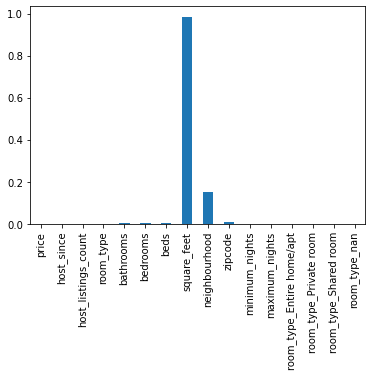

In [162]:
ax = df_predict_price.isna().mean().plot(kind='bar')


As we can clearly see column of neighborhood is missing some values, and column of square feet has whooping 98% values absent which makes it outright useless for us as we cannot guess it or impute it with mean/median/mode as none of those approaches is sensible for square feet.

Following are observations and approach for each column containng NaN values:

- bathrooms = impute with median
- bedrooms = impute with median
- beds = impute with median 
- square_feet = drop the column; reason being 98% values are absent.
- neighborhood = drop the rows where neighborhood is NaN
- zipcode = drop the rows where the value is NaN

Imputing values for columns bathrooms, bedrooms and beds.

In [163]:
df_predict_price.bathrooms.median()

1.0

In [164]:
df_predict_price.bathrooms.isna().sum()

14

In [165]:
df_predict_price.bathrooms.fillna(df_predict_price.bathrooms.median(), inplace=True)

In [166]:
df_predict_price.bathrooms.isna().sum()

0

In [167]:
df_predict_price.bedrooms.median()

1.0

In [168]:
df_predict_price.bedrooms.isna().sum()

10

In [169]:
df_predict_price.bedrooms.fillna(df_predict_price.bedrooms.median(), inplace=True)

In [170]:
df_predict_price.bedrooms.isna().sum()

0

In [171]:
df_predict_price.beds.median()

1.0

In [172]:
df_predict_price.beds.isna().sum()

9

In [173]:
df_predict_price.beds.fillna(df_predict_price.beds.median(), inplace=True)

In [174]:
df_predict_price.beds.isna().sum()

0

Dropping square_feet column

In [175]:
df_predict_price.square_feet.isna().mean()

0.9843793584379359

In [176]:
df_predict_price.columns[df_predict_price.columns.str.contains('quare')]

Index(['square_feet'], dtype='object')

In [177]:
df_predict_price.drop(columns=['square_feet'], inplace=True)

In [178]:
df_predict_price.columns[df_predict_price.columns.str.contains('quare')]

Index([], dtype='object')

Dropping rows of df_predict_price where values in either neighbourhood or zipcode are NaN

In [179]:
df_predict_price.neighbourhood.isna().sum()

543

In [180]:
df_predict_price.zipcode.isna().sum()

38

In [181]:
df_predict_price.shape

(3585, 15)

In [182]:
df_predict_price.dropna(subset=['neighbourhood', 'zipcode'], inplace=True)

In [183]:
df_predict_price.shape

(3037, 15)

In [184]:
df_predict_price.neighbourhood.isna().sum()

0

In [185]:
df_predict_price.zipcode.isna().sum()

0

In [572]:
df_predict_price.dtypes

price                               float64
host_since                   datetime64[ns]
host_listings_count                   int64
room_type                            object
bathrooms                           float64
bedrooms                            float64
beds                                float64
neighbourhood                        object
zipcode                              object
minimum_nights                        int64
maximum_nights                        int64
room_type_Entire home/apt             uint8
room_type_Private room                uint8
room_type_Shared room                 uint8
room_type_nan                         uint8
dtype: object

##### Question 6 = Predicting review_scores_value using subset of features. What are factors that are important causing a listing to get high rating in column review_scores_value?

X:
1. host_since
2. host_response_time
3. host_response_rate
4. host_acceptance_rate
5. host_is_superhost
6. host_identity_verified
7. neighbourhood
8. zipcode
9. price
10. security_deposit
11. cleaning_fee


y:
1. review_scores_value

In [283]:
df_boston_listings.security_deposit.unique()

array([nan, '$95.00', '$100.00', '$200.00', '$500.00', '$150.00',
       '$250.00', '$446.00', '$223.00', '$300.00', '$400.00', '$800.00',
       '$298.00', '$450.00', '$650.00', '$2,000.00', '$240.00',
       '$1,000.00', '$350.00', '$1,500.00', '$4,500.00', '$600.00',
       '$301.00', '$2,500.00', '$99.00', '$275.00', '$375.00', '$199.00',
       '$1,200.00', '$180.00', '$220.00', '$160.00', '$299.00', '$750.00',
       '$325.00', '$1,250.00', '$125.00', '$900.00', '$475.00',
       '$4,000.00', '$185.00', '$3,000.00', '$330.00', '$147.00',
       '$425.00', '$399.00', '$120.00', '$307.00', '$1,900.00', '$950.00',
       '$175.00', '$179.00', '$128.00', '$700.00', '$118.00'],
      dtype=object)

In [284]:
df_boston_listings.cleaning_fee.unique()

array(['$35.00', '$10.00', nan, '$50.00', '$15.00', '$30.00', '$40.00',
       '$150.00', '$20.00', '$100.00', '$85.00', '$25.00', '$56.00',
       '$45.00', '$125.00', '$80.00', '$5.00', '$120.00', '$18.00',
       '$90.00', '$200.00', '$140.00', '$95.00', '$60.00', '$75.00',
       '$7.00', '$64.00', '$12.00', '$135.00', '$250.00', '$70.00',
       '$9.00', '$8.00', '$55.00', '$175.00', '$65.00', '$69.00',
       '$130.00', '$6.00', '$84.00', '$13.00', '$29.00', '$160.00',
       '$49.00', '$119.00', '$197.00', '$155.00', '$158.00', '$166.00',
       '$199.00', '$99.00', '$225.00', '$39.00', '$54.00', '$24.00',
       '$110.00', '$136.00', '$115.00', '$83.00', '$42.00', '$139.00',
       '$79.00', '$37.00', '$28.00', '$82.00', '$19.00', '$57.00',
       '$72.00', '$58.00', '$66.00', '$180.00', '$300.00', '$14.00',
       '$129.00', '$105.00', '$149.00', '$52.00', '$34.00', '$59.00',
       '$230.00'], dtype=object)

In [285]:
df_boston_listings.neighbourhood.nunique()

30

In [286]:
df_boston_listings.shape

(3585, 95)

Creating dataframe with relevant X and y

In [1013]:
df_predict_review_scores_value = df_boston_listings.copy()

In [1014]:
predict_review_scores_value_x = ['host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',\
'host_is_superhost', 'host_identity_verified', 'neighbourhood', 'zipcode', 'price', 'security_deposit', 'cleaning_fee']

In [1015]:
predict_review_scores_value_y = ['review_scores_value']

In [1016]:
df_predict_review_scores_value = df_predict_review_scores_value[predict_review_scores_value_y + predict_review_scores_value_x]

In [1017]:
df_predict_review_scores_value.sample(3)

,review_scores_value,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,price,security_deposit,cleaning_fee
2167,NaN,2013-02-04,within an hour,100%,36%,f,t,West End,02114,$119.00,NaN,$119.00
5,10.0,2016-03-23,within a few hours,100%,95%,t,t,Roslindale,02131,$75.00,NaN,$30.00
1836,NaN,2015-08-13,NaN,NaN,NaN,f,f,NaN,02114,$150.00,NaN,NaN


##### Clean the data, drop not useful data, replace missing values, do feature engineering.

In [1018]:
df_predict_review_scores_value.columns

Index(['review_scores_value', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood', 'zipcode', 'price',
       'security_deposit', 'cleaning_fee'],
      dtype='object')

Checking if we have any rows where all columns are NaN

In [1019]:
df_predict_review_scores_value.isna().sum()

review_scores_value        821
host_since                   0
host_response_time         471
host_response_rate         471
host_acceptance_rate       471
host_is_superhost            0
host_identity_verified       0
neighbourhood              543
zipcode                     38
price                        0
security_deposit          2243
cleaning_fee              1107
dtype: int64

<AxesSubplot:>

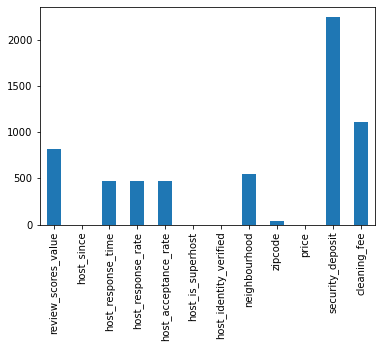

In [1020]:
df_predict_review_scores_value.isna().sum().plot(kind='bar')

In [1021]:
df_predict_review_scores_value.isna().mean()

review_scores_value       0.229010
host_since                0.000000
host_response_time        0.131381
host_response_rate        0.131381
host_acceptance_rate      0.131381
host_is_superhost         0.000000
host_identity_verified    0.000000
neighbourhood             0.151464
zipcode                   0.010600
price                     0.000000
security_deposit          0.625662
cleaning_fee              0.308787
dtype: float64

Dropping rows where label (y variable); review_scores_value is NaN

In [1022]:
df_predict_review_scores_value.dropna(subset=['review_scores_value']).shape

(2764, 12)

In [1023]:
df_predict_review_scores_value.dropna(subset=['review_scores_value'],inplace=True)

In [1024]:
df_predict_review_scores_value.shape

(2764, 12)

In [1025]:
df_predict_review_scores_value.review_scores_value.isna().sum()

0

Checking for datatypes of all columns, make appropriate chagnges as needed.

In [1026]:
df_predict_review_scores_value.sample(3)

,review_scores_value,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,price,security_deposit,cleaning_fee
1163,9.0,2015-10-13,within a day,100%,50%,f,f,South End,02116,$160.00,NaN,$30.00
1864,9.0,2013-06-12,within an hour,100%,100%,t,t,Beacon Hill,02108,$250.00,NaN,$60.00
3050,10.0,2015-03-30,within a few hours,98%,55%,f,t,South Boston,02210,$169.00,NaN,$100.00


In [1027]:
df_predict_review_scores_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 1 to 3583
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_scores_value     2764 non-null   float64
 1   host_since              2764 non-null   object 
 2   host_response_time      2547 non-null   object 
 3   host_response_rate      2547 non-null   object 
 4   host_acceptance_rate    2547 non-null   object 
 5   host_is_superhost       2764 non-null   object 
 6   host_identity_verified  2764 non-null   object 
 7   neighbourhood           2361 non-null   object 
 8   zipcode                 2739 non-null   object 
 9   price                   2764 non-null   object 
 10  security_deposit        1118 non-null   object 
 11  cleaning_fee            1972 non-null   object 
dtypes: float64(1), object(11)
memory usage: 280.7+ KB


In [1028]:
df_predict_review_scores_value.host_response_time.value_counts()

within an hour        1171
within a few hours     975
within a day           379
a few days or more      22
Name: host_response_time, dtype: int64

Following are proposed datatype changes:

1. change host_since from object to float.
2. change host_response_rate from object to float
3. change host_acceptance_rate from object to float
4. change host_is_superhost from object to Bool
5. change host_identity_verified from object to Bool
6. change price from object to float
7. change security_deposit from object to float
8. change cleaning_fee from object to float
9. Change zipcode from object to float.

In [1041]:
df_predict_review_scores_value.host_since.sample(3)

2045    2012-05-12
611     2015-03-30
1512    2016-08-23
Name: host_since, dtype: object

In [1047]:
df_predict_review_scores_value.host_since.replace({'-':''}, regex=True).astype('float')

1       20120607.0
2       20090511.0
3       20130421.0
4       20140511.0
5       20160323.0
           ...    
3574    20160825.0
3575    20140731.0
3578    20160618.0
3580    20140731.0
3583    20160527.0
Name: host_since, Length: 2764, dtype: float64

In [1048]:
df_predict_review_scores_value['host_since'] = df_predict_review_scores_value.host_since.replace({'-':''}, regex=True).astype('float')

In [1049]:
df_predict_review_scores_value.shape

(2764, 12)

In [1051]:
df_predict_review_scores_value.columns

Index(['review_scores_value', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood', 'zipcode', 'price',
       'security_deposit', 'cleaning_fee'],
      dtype='object')

In [1052]:
df_predict_review_scores_value.host_response_rate.sample(3)

3219    100%
3477    100%
3045    100%
Name: host_response_rate, dtype: object

df_predict_price.price = df_predict_price.price.replace({'\$':'',',':''}, regex=True).astype('float')

In [1053]:
df_predict_review_scores_value.host_response_rate = df_predict_review_scores_value.host_response_rate.replace({'%':'',',':''}, regex=True).astype('float')

In [1054]:
df_predict_review_scores_value.host_response_rate.sample(3)

494     100.0
278      90.0
3047    100.0
Name: host_response_rate, dtype: float64

In [1055]:
df_predict_review_scores_value.host_acceptance_rate.sample(3)

2593     92%
1858    100%
45       83%
Name: host_acceptance_rate, dtype: object

In [1056]:
df_predict_review_scores_value.host_acceptance_rate = df_predict_review_scores_value.host_acceptance_rate\
.replace({'%':'',',':''}, regex=True).astype('float')

In [1057]:
df_predict_review_scores_value.host_acceptance_rate.sample(3)

78     100.0
913     29.0
576     97.0
Name: host_acceptance_rate, dtype: float64

In [1058]:
df_predict_review_scores_value.host_is_superhost.sample(3)

2360    f
1759    f
2821    f
Name: host_is_superhost, dtype: object

In [1059]:
df_predict_review_scores_value['host_is_superhost']=(df_predict_review_scores_value.host_is_superhost=='t')

In [1060]:
df_predict_review_scores_value.host_is_superhost.sample(3)

2775    False
1348     True
2362     True
Name: host_is_superhost, dtype: bool

In [1061]:
df_predict_review_scores_value.host_identity_verified.sample(3)

493     t
132     t
3000    f
Name: host_identity_verified, dtype: object

In [1062]:
df_predict_review_scores_value['host_identity_verified']=(df_predict_review_scores_value.host_identity_verified=='t')

In [1063]:
df_predict_review_scores_value.host_identity_verified.sample(3)

155      True
1028     True
182     False
Name: host_identity_verified, dtype: bool

In [1064]:
df_predict_review_scores_value.price.sample(3)

192      $59.00
508      $74.00
2472    $359.00
Name: price, dtype: object

In [1065]:
df_predict_review_scores_value.price = df_predict_review_scores_value.price.replace({'\$':'',',':''}, regex=True)\
.astype('float')

In [1066]:
df_predict_review_scores_value.price.sample(3)

3077    179.0
1716    320.0
2611    140.0
Name: price, dtype: float64

In [1067]:
df_predict_review_scores_value.security_deposit.sample(3)

2495          NaN
1022    $1,000.00
1862          NaN
Name: security_deposit, dtype: object

In [1068]:
df_predict_review_scores_value.security_deposit = df_predict_review_scores_value.security_deposit.replace({'\$':'',',':''}, regex=True)\
.astype('float')

In [1069]:
df_predict_review_scores_value.security_deposit.sample(3)

925     150.0
2762      NaN
2786    500.0
Name: security_deposit, dtype: float64

In [1070]:
df_predict_review_scores_value.cleaning_fee.sample(3)

1692        NaN
1238     $60.00
2945    $150.00
Name: cleaning_fee, dtype: object

In [1071]:
df_predict_review_scores_value.cleaning_fee = df_predict_review_scores_value.cleaning_fee.replace({'\$':'',',':''}, regex=True)\
.astype('float')

In [1072]:
df_predict_review_scores_value.cleaning_fee.sample(3)

66       NaN
2949    20.0
3184     NaN
Name: cleaning_fee, dtype: float64

In [1073]:
df_predict_review_scores_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 1 to 3583
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_scores_value     2764 non-null   float64
 1   host_since              2764 non-null   float64
 2   host_response_time      2547 non-null   object 
 3   host_response_rate      2547 non-null   float64
 4   host_acceptance_rate    2547 non-null   float64
 5   host_is_superhost       2764 non-null   bool   
 6   host_identity_verified  2764 non-null   bool   
 7   neighbourhood           2361 non-null   object 
 8   zipcode                 2739 non-null   object 
 9   price                   2764 non-null   float64
 10  security_deposit        1118 non-null   float64
 11  cleaning_fee            1972 non-null   float64
dtypes: bool(2), float64(7), object(3)
memory usage: 242.9+ KB


In [1074]:
df_predict_review_scores_value.host_response_time.nunique()

4

In [1075]:
df_predict_review_scores_value.neighbourhood.nunique()

29

Converting host_response_time from object to categorical using pd.get_dummies

In [1076]:
cat_df = pd.get_dummies(df_predict_review_scores_value['host_response_time'], dummy_na=True,prefix='host_response_time')

In [1077]:
cat_df.sample(3)

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan
2727,0,0,0,1,0
2488,0,0,0,1,0
3503,0,0,0,0,1


In [1078]:
cat_df.shape

(2764, 5)

In [1079]:
df_predict_review_scores_value.shape

(2764, 12)

In [1080]:
df_predict_review_scores_value.merge(cat_df, left_index=True, right_index=True).shape

(2764, 17)

In [1081]:
df_predict_review_scores_value = df_predict_review_scores_value.merge(cat_df, left_index=True, right_index=True)

In [1082]:
df_predict_review_scores_value.shape

(2764, 17)

In [1083]:
df_predict_review_scores_value.zipcode.sample(5)

3360    02134
3570    02141
927     02118
2426    02215
3288    02127
Name: zipcode, dtype: object

In [1084]:
set(df_predict_review_scores_value.zipcode)

{'02108',
 '02108 02111',
 '02109',
 '02110',
 '02111',
 '02113',
 '02114',
 '02115',
 '02116',
 '02118',
 '02119',
 '02120',
 '02121',
 '02122',
 '02124',
 '02125',
 '02126',
 '02127',
 '02128',
 '02129',
 '02130',
 '02131',
 '02132',
 '02134',
 '02134-1704',
 '02135',
 '02136',
 '02138',
 '02139',
 '02141',
 '02142',
 '02143',
 '02145',
 '02163',
 '02186',
 '02210',
 '02215',
 '02445',
 '02446',
 '02467',
 nan}

First we need to replace space and hyphen in some zipcodes then change the datattype.

In [1085]:
df_predict_review_scores_value.zipcode.replace({' ':'','-':''}, regex=True, inplace=True)

In [1086]:
df_predict_review_scores_value.zipcode = df_predict_review_scores_value.zipcode.astype('float')

In [1087]:
df_predict_review_scores_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 1 to 3583
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   review_scores_value                    2764 non-null   float64
 1   host_since                             2764 non-null   float64
 2   host_response_time                     2547 non-null   object 
 3   host_response_rate                     2547 non-null   float64
 4   host_acceptance_rate                   2547 non-null   float64
 5   host_is_superhost                      2764 non-null   bool   
 6   host_identity_verified                 2764 non-null   bool   
 7   neighbourhood                          2361 non-null   object 
 8   zipcode                                2739 non-null   float64
 9   price                                  2764 non-null   float64
 10  security_deposit                       1118 non-null   float64
 11  clea

Checking for NaN in all X columns.

In [1088]:
df_predict_review_scores_value.isna().mean()

review_scores_value                      0.000000
host_since                               0.000000
host_response_time                       0.078509
host_response_rate                       0.078509
host_acceptance_rate                     0.078509
host_is_superhost                        0.000000
host_identity_verified                   0.000000
neighbourhood                            0.145803
zipcode                                  0.009045
price                                    0.000000
security_deposit                         0.595514
cleaning_fee                             0.286541
host_response_time_a few days or more    0.000000
host_response_time_within a day          0.000000
host_response_time_within a few hours    0.000000
host_response_time_within an hour        0.000000
host_response_time_nan                   0.000000
dtype: float64

In [1089]:
df_predict_review_scores_value.isna().sum()

review_scores_value                         0
host_since                                  0
host_response_time                        217
host_response_rate                        217
host_acceptance_rate                      217
host_is_superhost                           0
host_identity_verified                      0
neighbourhood                             403
zipcode                                    25
price                                       0
security_deposit                         1646
cleaning_fee                              792
host_response_time_a few days or more       0
host_response_time_within a day             0
host_response_time_within a few hours       0
host_response_time_within an hour           0
host_response_time_nan                      0
dtype: int64

<AxesSubplot:>

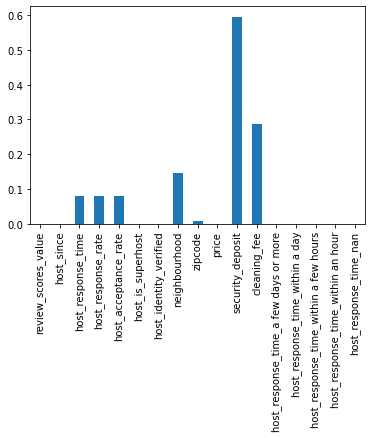

In [1090]:
df_predict_review_scores_value.isna().mean().plot(kind='bar')

Following is an approach for columns having NaN values:
1. host_response_time = Drop the column, we already have converted the categorical column to dummy columns with different dummy column for NaN values.
2. host_response_rate = Impute the value with average(mean) of the column.
3. host_acceptance_rate = Impute the value with average(mean) of the column.
4. neighborhood = Drop the rows where neighborhood values are NaN as there is no easy way to recover the missing values.
5. security_deposit = 59% values are missing, so we will simply drop this column from the analysis.
6. cleaning_fee = Impute the value with average(mean) of the column.
7. zipcoode = Drop rows where zipcode is missing.

In [1091]:
df_predict_review_scores_value.shape

(2764, 17)

In [1092]:
df_predict_review_scores_value.drop(columns=['host_response_time'], inplace=True)

In [1093]:
df_predict_review_scores_value.shape

(2764, 16)

In [1094]:
df_predict_review_scores_value.host_response_rate.isna().sum()

217

In [1095]:
df_predict_review_scores_value.host_response_rate.fillna(df_predict_review_scores_value.host_response_rate.mean()\
                                                         , inplace=True)

In [1096]:
df_predict_review_scores_value.host_response_rate.isna().sum()

0

In [1097]:
df_predict_review_scores_value.host_acceptance_rate.isna().sum()

217

In [1098]:
df_predict_review_scores_value.host_acceptance_rate.fillna(df_predict_review_scores_value.host_acceptance_rate.mean()\
                                                         , inplace=True)

In [1099]:
df_predict_review_scores_value.host_acceptance_rate.isna().sum()

0

In [1100]:
df_predict_review_scores_value.shape

(2764, 16)

In [1101]:
df_predict_review_scores_value.dropna(subset=['neighbourhood'], inplace=True)

In [1102]:
df_predict_review_scores_value.shape

(2361, 16)

In [1103]:
df_predict_review_scores_value.shape

(2361, 16)

In [1104]:
df_predict_review_scores_value.drop(columns=['security_deposit'], inplace=True)

In [1105]:
df_predict_review_scores_value.shape

(2361, 15)

In [1106]:
df_predict_review_scores_value.cleaning_fee.isna().sum()

662

In [1107]:
df_predict_review_scores_value.cleaning_fee.fillna(df_predict_review_scores_value.cleaning_fee.mean()\
                                                         , inplace=True)

In [1108]:
df_predict_review_scores_value.cleaning_fee.isna().sum()

0

In [1147]:
df_predict_review_scores_value.dropna(subset=['zipcode'], inplace=True)

##### Question 7 = what are factors that cause a listing to be booked a lot?  Predicting average availability of a listing.

X:
1. host_since
2. neighbourhood
3. street
4. zipcode
5. bathrooms
6. beds
7. price
8. number_of_reviews
9. review_scores_value
10. require_guest_phone_verification
11. listing_id


y:
1. column describing average availability for each listing (calendar.listing_id.available.mean()) = listing_average_availability

In [394]:
df_boston_listings.market.value_counts()

Boston                   3568
San Francisco               1
Other (Domestic)            1
Other (International)       1
Name: market, dtype: int64

In [395]:
predict_listing_average_availability_x = ['id','host_since', 'neighbourhood', 'street', 'zipcode', 'bathrooms', 'beds',\
'price', 'number_of_reviews', 'review_scores_value', 'require_guest_phone_verification']

Creating dataframe with relevant X and y

In [396]:
df_predict_listing_average_availability = df_boston_listings.copy()

As the predicted column is a derived column we need to create it from existing columns.

In [397]:
temp_df = pd.DataFrame()

In [398]:
temp_df['average_availability'] = df_boston_calendar.groupby(['listing_id'])['available'].mean()

In [399]:
temp_df.shape

(3585, 1)

In [400]:
temp_df.sample(3)

,average_availability
listing_id,
13667826,0.00000
9751520,0.00000
3294152,0.90137


In [401]:
temp_df['listing_id'] = temp_df.index

In [402]:
temp_df.reset_index(drop=True, inplace=True)

In [403]:
temp_df.sample(3)

,average_availability,listing_id
3200,0.008219,14104621
2041,0.000000,9712731
609,0.405479,3342206


In [404]:
df_predict_listing_average_availability = df_predict_listing_average_availability[predict_listing_average_availability_x]

In [405]:
print(df_predict_listing_average_availability.columns)
print(temp_df.columns)

Index(['id', 'host_since', 'neighbourhood', 'street', 'zipcode', 'bathrooms',
       'beds', 'price', 'number_of_reviews', 'review_scores_value',
       'require_guest_phone_verification'],
      dtype='object')
Index(['average_availability', 'listing_id'], dtype='object')


In [406]:
print(df_predict_listing_average_availability.shape)
print(temp_df.shape)

(3585, 11)
(3585, 2)


In [407]:
len(df_predict_listing_average_availability.merge(temp_df, left_on='id', right_on='listing_id'))

3585

In [408]:
df_predict_listing_average_availability = df_predict_listing_average_availability.merge(temp_df, left_on='id', right_on='listing_id')

In [409]:
df_predict_listing_average_availability.shape

(3585, 13)

In [410]:
df_predict_listing_average_availability.sample(3)

,id,host_since,neighbourhood,street,zipcode,bathrooms,beds,price,number_of_reviews,review_scores_value,require_guest_phone_verification,average_availability,listing_id
2930,14127153,2014-05-30,NaN,"Stockton Street, Boston, MA 02124, United States",02124,1.0,1.0,$31.00,1,10.0,f,0.934247,14127153
1582,11498416,2015-01-11,East Boston,"Orleans Street, Boston, MA 02128, United States",02128,2.0,1.0,$60.00,38,8.0,f,0.189041,11498416
2463,1835533,2012-02-07,Fenway/Kenmore,"Commonwealth Avenue, Boston, MA 02215, United ...",02215,1.0,1.0,$139.00,38,8.0,f,0.000000,1835533


In [411]:
df_predict_listing_average_availability.columns

Index(['id', 'host_since', 'neighbourhood', 'street', 'zipcode', 'bathrooms',
       'beds', 'price', 'number_of_reviews', 'review_scores_value',
       'require_guest_phone_verification', 'average_availability',
       'listing_id'],
      dtype='object')

We do not need id, listing_id column in this dataframe. Therefore we will drop it now.

In [412]:
predict_listing_average_availability_x = ['average_availability','host_since', 'neighbourhood', 'street', 'zipcode', 'bathrooms',
       'beds', 'price', 'number_of_reviews', 'review_scores_value',
       'require_guest_phone_verification']

In [413]:
df_predict_listing_average_availability = df_predict_listing_average_availability[predict_listing_average_availability_x]

In [414]:
df_predict_listing_average_availability.columns

Index(['average_availability', 'host_since', 'neighbourhood', 'street',
       'zipcode', 'bathrooms', 'beds', 'price', 'number_of_reviews',
       'review_scores_value', 'require_guest_phone_verification'],
      dtype='object')

In [415]:
df_predict_listing_average_availability.sample(3)

,average_availability,host_since,neighbourhood,street,zipcode,bathrooms,beds,price,number_of_reviews,review_scores_value,require_guest_phone_verification
2334,1.000000,2015-03-30,Fenway/Kenmore,"Boylston Street, Boston, MA 02215, United States",02215,2.0,2.0,$199.00,0,NaN,f
436,0.942466,2013-09-24,Mission Hill,"Sunset Street, Boston, MA 02120, United States",02120,1.0,2.0,$52.00,14,9.0,f
1386,0.501370,2015-11-08,Back Bay,"Beacon Street, Boston, MA 02116, United States",02116,1.0,1.0,$229.00,8,8.0,f


##### Clean the data, drop not useful data, replace missing values, do feature engineering.

In [416]:
df_predict_listing_average_availability.shape

(3585, 11)

In [417]:
df_predict_listing_average_availability.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   average_availability              3585 non-null   float64
 1   host_since                        3585 non-null   object 
 2   neighbourhood                     3042 non-null   object 
 3   street                            3585 non-null   object 
 4   zipcode                           3547 non-null   object 
 5   bathrooms                         3571 non-null   float64
 6   beds                              3576 non-null   float64
 7   price                             3585 non-null   object 
 8   number_of_reviews                 3585 non-null   int64  
 9   review_scores_value               2764 non-null   float64
 10  require_guest_phone_verification  3585 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 336.1+ KB


Checking for presence of rows where all columns are NaN

In [420]:
df_predict_listing_average_availability.isna().sum()

average_availability                  0
host_since                            0
neighbourhood                       543
street                                0
zipcode                              38
bathrooms                            14
beds                                  9
price                                 0
number_of_reviews                     0
review_scores_value                 821
require_guest_phone_verification      0
dtype: int64

In [421]:
df_predict_listing_average_availability.isna().mean()

average_availability                0.000000
host_since                          0.000000
neighbourhood                       0.151464
street                              0.000000
zipcode                             0.010600
bathrooms                           0.003905
beds                                0.002510
price                               0.000000
number_of_reviews                   0.000000
review_scores_value                 0.229010
require_guest_phone_verification    0.000000
dtype: float64

Checking and dropping rows where y value (listing_average_availability) is NaN

In [422]:
df_predict_listing_average_availability.average_availability.isna().sum()

0

Checking datatypes of all columns and making relevant changes if needed

In [423]:
df_predict_listing_average_availability.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   average_availability              3585 non-null   float64
 1   host_since                        3585 non-null   object 
 2   neighbourhood                     3042 non-null   object 
 3   street                            3585 non-null   object 
 4   zipcode                           3547 non-null   object 
 5   bathrooms                         3571 non-null   float64
 6   beds                              3576 non-null   float64
 7   price                             3585 non-null   object 
 8   number_of_reviews                 3585 non-null   int64  
 9   review_scores_value               2764 non-null   float64
 10  require_guest_phone_verification  3585 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 336.1+ KB


In [430]:
df_predict_listing_average_availability.street.nunique(), df_predict_listing_average_availability.shape

(1239, (3585, 11))

In [433]:
df_predict_listing_average_availability.require_guest_phone_verification.sample(3)

2592    f
3242    f
435     f
Name: require_guest_phone_verification, dtype: object

Following are proposed datatype changes:

1. change host_since from object to datetime and then create different columns for year, month and day.
2. change price from object to float.
3. change require_guest_phone_verification from object to Bool
4. Change zipcode from Object to float

In [434]:
df_predict_listing_average_availability['host_since'] = pd.to_datetime(df_predict_listing_average_availability.\
                                                                       host_since)

df_predict_listing_average_availability.host_since is datetime that should be changed to year, month, day columns as LinearRegression model cannot work on datetime datatype.

In [583]:
df_predict_listing_average_availability['host_since_year'] = pd.DatetimeIndex(df_predict_listing_average_availability['host_since']).year

In [584]:
df_predict_listing_average_availability['host_since_month'] = pd.DatetimeIndex(df_predict_listing_average_availability['host_since']).month

In [585]:
df_predict_listing_average_availability['host_since_day'] = pd.DatetimeIndex(df_predict_listing_average_availability['host_since']).day

In [586]:
df_predict_listing_average_availability.columns

Index(['average_availability', 'host_since', 'neighbourhood', 'street',
       'zipcode', 'bathrooms', 'beds', 'price', 'number_of_reviews',
       'review_scores_value', 'require_guest_phone_verification',
       'host_since_year', 'host_since_month', 'host_since_day'],
      dtype='object')

In [435]:
df_predict_listing_average_availability.price.sample(3)

819     $125.00
2082    $289.00
797      $75.00
Name: price, dtype: object

In [437]:
df_predict_listing_average_availability.price = df_predict_listing_average_availability.price\
.replace({'\$':'',',':''}, regex=True).astype('float')

In [450]:
df_predict_listing_average_availability.price.sample(3)

2213     67.0
1149    161.0
2208    200.0
Name: price, dtype: float64

In [451]:
df_predict_listing_average_availability.require_guest_phone_verification.sample(3)

1056    f
3505    f
405     f
Name: require_guest_phone_verification, dtype: object

In [459]:
df_predict_listing_average_availability['require_guest_phone_verification']=\
(df_predict_listing_average_availability.require_guest_phone_verification=='t')

In [468]:
df_predict_listing_average_availability.require_guest_phone_verification.sample(3)

113     False
458     False
2840    False
Name: require_guest_phone_verification, dtype: bool

In [630]:
set(df_predict_listing_average_availability.zipcode)

{'02108',
 '02108 02111',
 '02109',
 '02110',
 '02111',
 '02113',
 '02114',
 '02115',
 '02116',
 '02118',
 '02119',
 '02120',
 '02121',
 '02122',
 '02124',
 '02125',
 '02126',
 '02127',
 '02128',
 '02129',
 '02130',
 '02131',
 '02132',
 '02134',
 '02134-1704',
 '02135',
 '02136',
 '02139',
 '02141',
 '02143',
 '02145',
 '02163',
 '02210',
 '02215',
 '02445',
 '02446',
 '02467'}

First we need to replace space and hyphen in some zipcodes then change the datattype.

In [631]:
df_predict_listing_average_availability.zipcode.replace({' ':'','-':''}, regex=True, inplace=True)

In [632]:
df_predict_listing_average_availability.zipcode = df_predict_listing_average_availability.zipcode.astype('float')

In [633]:
df_predict_listing_average_availability.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357 entries, 1 to 3583
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   average_availability              2357 non-null   float64       
 1   host_since                        2357 non-null   datetime64[ns]
 2   neighbourhood                     2357 non-null   object        
 3   street                            2357 non-null   object        
 4   zipcode                           2357 non-null   float64       
 5   bathrooms                         2357 non-null   float64       
 6   beds                              2357 non-null   float64       
 7   price                             2357 non-null   float64       
 8   number_of_reviews                 2357 non-null   int64         
 9   review_scores_value               2357 non-null   float64       
 10  require_guest_phone_verification  2357 non-null 

In [470]:
df_predict_listing_average_availability.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   average_availability              3585 non-null   float64       
 1   host_since                        3585 non-null   datetime64[ns]
 2   neighbourhood                     3042 non-null   object        
 3   street                            3585 non-null   object        
 4   zipcode                           3547 non-null   object        
 5   bathrooms                         3571 non-null   float64       
 6   beds                              3576 non-null   float64       
 7   price                             3585 non-null   float64       
 8   number_of_reviews                 3585 non-null   int64         
 9   review_scores_value               2764 non-null   float64       
 10  require_guest_phone_verification  3585 non-null 

In [471]:
df_predict_listing_average_availability.isna().sum()

average_availability                  0
host_since                            0
neighbourhood                       543
street                                0
zipcode                              38
bathrooms                            14
beds                                  9
price                                 0
number_of_reviews                     0
review_scores_value                 821
require_guest_phone_verification      0
dtype: int64

In [472]:
df_predict_listing_average_availability.isna().mean()

average_availability                0.000000
host_since                          0.000000
neighbourhood                       0.151464
street                              0.000000
zipcode                             0.010600
bathrooms                           0.003905
beds                                0.002510
price                               0.000000
number_of_reviews                   0.000000
review_scores_value                 0.229010
require_guest_phone_verification    0.000000
dtype: float64

<AxesSubplot:>

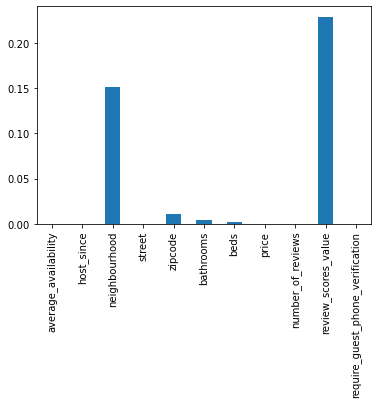

In [474]:
df_predict_listing_average_availability.isna().mean().plot(kind='bar')

In [475]:
df_predict_listing_average_availability.isna().sum()

average_availability                  0
host_since                            0
neighbourhood                       543
street                                0
zipcode                              38
bathrooms                            14
beds                                  9
price                                 0
number_of_reviews                     0
review_scores_value                 821
require_guest_phone_verification      0
dtype: int64

Following are observations and approach for each column containng NaN values:

1. neighborhood = drop the rows where neighborhood is NaN
2. zipcode = drop the rows where the value is NaN
3. bathrooms = impute with median
4. beds = impute with median
5. review_scores_value = drop rows where the value is NaN


Dropping rows where either neighbourhood, zipcode, review_scores_value is NaN

In [478]:
df_predict_listing_average_availability.shape

(3585, 11)

In [479]:
df_predict_listing_average_availability.dropna(subset=['neighbourhood','zipcode','review_scores_value'], inplace=True)

In [480]:
df_predict_listing_average_availability.shape

(2357, 11)

In [481]:
df_predict_listing_average_availability.bathrooms.fillna(df_predict_listing_average_availability.\
                                                         bathrooms.median(), inplace=True)

In [483]:
df_predict_listing_average_availability.beds.fillna(df_predict_listing_average_availability.\
                                                         beds.median(), inplace=True)

In [582]:
df_predict_listing_average_availability.isna().sum()

average_availability                0
host_since                          0
neighbourhood                       0
street                              0
zipcode                             0
bathrooms                           0
beds                                0
price                               0
number_of_reviews                   0
review_scores_value                 0
require_guest_phone_verification    0
dtype: int64

<li><a href="#TOC">Back To Table Of Contents</a></li>

<a id='modeling'></a>
## Modeling

> **Tip**: Here starts modeling of the data, depending on the targeted business goals and insights modeling technique/s is chosen and relevant model is trained and predictions are made. Performance of the model is also evaluated in this step using several inbuilt functions.
<br><br>All proposed questions might not need data mining techniques, in such cases descriptive and inferential statistics is used to get the needed answers.


##### Question 1 =  Which zipcodes contain listings that are leaders in being booked?

In [485]:
df_zipcode_details.sample(3)

,zipcode,booking_percentage,review_scores_value
2,02109,0.353102,9.085714
1,02108 02111,0.646575,9.000000
34,02169,0.989041,NaN


In order to find top x zipcodes ranked in booking percentage, we can simply use nlargest function.

In [490]:
df_zipcode_details.nlargest(15, 'booking_percentage')[['zipcode','booking_percentage']]

,zipcode,booking_percentage
34,02169,0.989041
31,02143,0.984344
42,02472,0.928767
38,02218,0.915068
30,02142,0.901370
16,02126,0.782763
13,02122,0.714384
32,02145,0.689041
14,02124,0.673938
21,02131,0.669758


In [487]:
df_zipcode_details.shape

(43, 3)

Plotting the top 10 zipcodes

<AxesSubplot:>

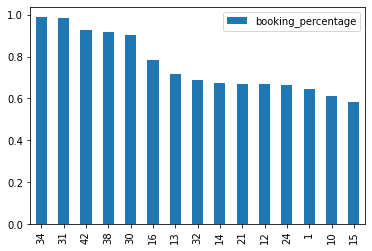

In [492]:
df_zipcode_details.nlargest(15, 'booking_percentage')[['zipcode','booking_percentage']].plot(kind='bar')

Plotting all zipcodes

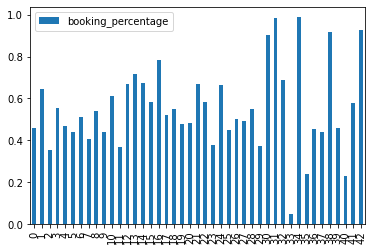

In [503]:
df_zipcode_details[['zipcode', 'booking_percentage']].plot(kind='bar')
plt.xticks(rotation=90);

It is difficult to see the zipcodes  in this figure, we will try this again with larger figure size

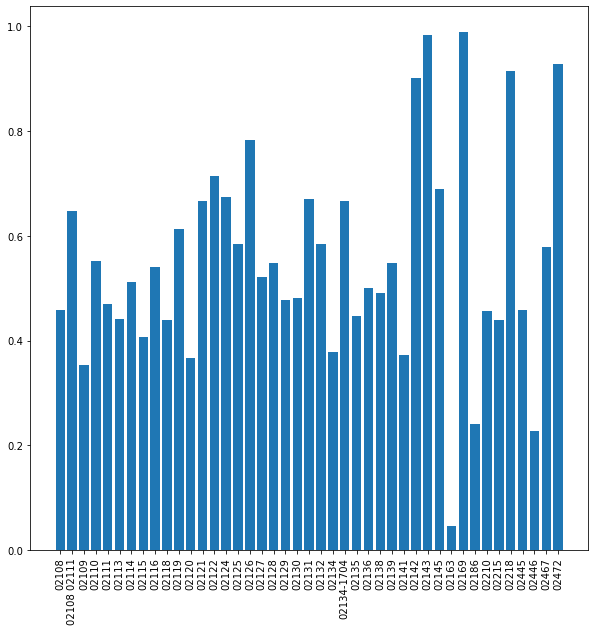

In [634]:
from matplotlib.pyplot import figure
plt.figure(figsize=(10,10))
plt.bar(df_zipcode_details['zipcode'], df_zipcode_details['booking_percentage'])
plt.xticks(rotation=90);

##### Question 2 =  Which zipcodes are leaders in having Listings with high reviews in user ratings? 

In [519]:
df_zipcode_details.sample(3)

,zipcode,booking_percentage,review_scores_value
21,02131,0.669758,9.559322
16,02126,0.782763,9.055556
23,02134,0.378389,9.011696


In [535]:
df_temp = df_zipcode_details.nlargest(15, 'review_scores_value')[['zipcode','review_scores_value']]

In [536]:
df_temp

,zipcode,review_scores_value
27,02138,10.000000
33,02163,10.000000
40,02446,10.000000
21,02131,9.559322
22,02132,9.555556
19,02129,9.522388
39,02445,9.500000
5,02113,9.421687
20,02130,9.414894
17,02127,9.389937


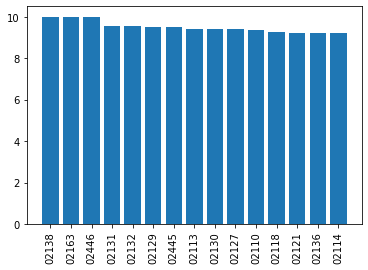

In [523]:
plt.bar(df_temp.zipcode, df_temp.review_scores_value)
plt.xticks(rotation=90);

##### Question 3 =  Which neighbourhood are leaders in having Listings being booked?

In [524]:
df_neighbourhood_details.sample(3)

,neighbourhood,review_scores_value,booking_percentage
23,Roxbury,8.978947,0.583373
20,Mission Hill,8.626866,0.348052
17,Jamaica Plain,9.460967,0.485115


In [537]:
df_temp = df_neighbourhood_details.nlargest(15, 'booking_percentage')[['neighbourhood','booking_percentage']]

In [538]:
df_temp

,neighbourhood,booking_percentage
14,Government Center,0.788128
6,Chestnut Hill,0.722603
19,Mattapan,0.695479
4,Cambridge,0.688063
22,Roslindale,0.669973
24,Somerville,0.661117
28,West End,0.648187
8,Dorchester,0.613109
23,Roxbury,0.583373
9,Downtown,0.561986


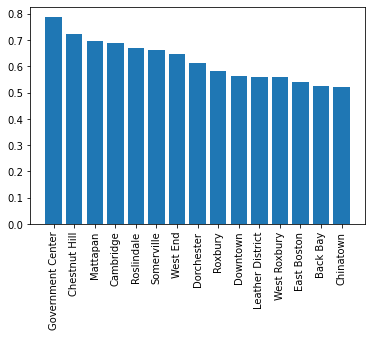

In [539]:
plt.bar(df_temp.neighbourhood, df_temp.booking_percentage)
plt.xticks(rotation=90);

##### Question 4 = Which neighbourhoods are leaders with listings having high reviews in user ratings?

In [531]:
df_neighbourhood_details.sample(3)

,neighbourhood,review_scores_value,booking_percentage
1,Back Bay,9.127854,0.525999
22,Roslindale,9.565217,0.669973
0,Allston-Brighton,9.059701,0.380521


In [541]:
df_temp = df_neighbourhood_details.nlargest(15, 'review_scores_value')[['neighbourhood','review_scores_value']]

In [542]:
df_temp

,neighbourhood,review_scores_value
13,Financial District,10.000000
18,Leather District,9.800000
29,West Roxbury,9.629630
22,Roslindale,9.565217
3,Brookline,9.500000
17,Jamaica Plain,9.460967
5,Charlestown,9.442623
25,South Boston,9.353933
14,Government Center,9.333333
21,North End,9.327103


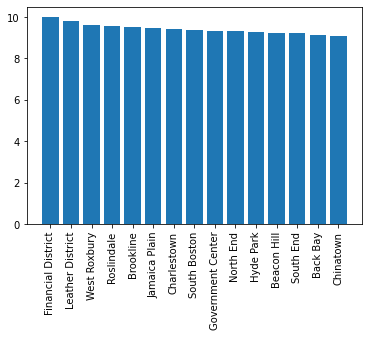

In [534]:
plt.bar(df_temp.neighbourhood, df_temp.review_scores_value)
plt.xticks(rotation=90);

##### Question 5 = Predicting price of the listing space using subset of features. Trying to understand which are most impactful features out of selected ones .

In [635]:
df_predict_price.sample(3)

,price,host_since,host_listings_count,room_type,bathrooms,bedrooms,beds,neighbourhood,zipcode,minimum_nights,maximum_nights,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,host_since_year,host_since_month,host_since_day
1928,197.0,2012-12-19,1,Entire home/apt,1.0,1.0,1.0,Beacon Hill,2114.0,2,11,1,0,0,0,2012,12,19
1969,499.0,2013-08-14,1,Private room,1.0,1.0,1.0,Beacon Hill,2114.0,3,365,0,1,0,0,2013,8,14
2010,79.0,2016-09-01,2,Private room,1.0,1.0,1.0,Beacon Hill,2114.0,2,21,0,1,0,0,2016,9,1


In [636]:
df_predict_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3037 entries, 0 to 3584
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   price                      3037 non-null   float64       
 1   host_since                 3037 non-null   datetime64[ns]
 2   host_listings_count        3037 non-null   int64         
 3   room_type                  3037 non-null   object        
 4   bathrooms                  3037 non-null   float64       
 5   bedrooms                   3037 non-null   float64       
 6   beds                       3037 non-null   float64       
 7   neighbourhood              3037 non-null   object        
 8   zipcode                    3037 non-null   float64       
 9   minimum_nights             3037 non-null   int64         
 10  maximum_nights             3037 non-null   int64         
 11  room_type_Entire home/apt  3037 non-null   uint8         
 12  room_t

In [637]:
df_predict_price.columns.values

array(['price', 'host_since', 'host_listings_count', 'room_type',
       'bathrooms', 'bedrooms', 'beds', 'neighbourhood', 'zipcode',
       'minimum_nights', 'maximum_nights', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'room_type_nan',
       'host_since_year', 'host_since_month', 'host_since_day'],
      dtype=object)

In [638]:
X = ['host_listings_count', 'bathrooms', 'bedrooms', 'beds', 'zipcode',
       'minimum_nights', 'maximum_nights', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'room_type_nan',
       'host_since_year', 'host_since_month', 'host_since_day']

In [639]:
y = ['price']

In [640]:
X_train, X_test, y_train, y_test = train_test_split (df_predict_price[X], df_predict_price[y]\
                                                     , test_size = .3, random_state = 42)

In [641]:
lm_model = LinearRegression(normalize=True)

In [642]:
lm_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [643]:
y_pred = lm_model.predict(X_test)

In [645]:
r2_test_score = r2_score(y_test, y_pred)

In [648]:
print(r2_test_score)

0.23351756822540115


In [649]:
mse_score = mean_squared_error(y_test, y_pred)

In [650]:
print(mse_score)

18261.829271055034


In [942]:
X = ['host_listings_count','bathrooms', 'bedrooms', 'room_type_Entire home/apt', 
       'room_type_Private room', 'room_type_Shared room', 'room_type_nan',
       'host_since_year', 'host_since_month', 'host_since_day']

In [943]:
y = ['price']

In [944]:
X_train, X_test, y_train, y_test = train_test_split (df_predict_price[X], df_predict_price[y]\
                                                     , test_size = .5, random_state = 42)

In [945]:
lm_model = LinearRegression(normalize=True)

In [946]:
lm_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [947]:
y_pred = lm_model.predict(X_test)

In [948]:
r2_test_score = r2_score(y_test, y_pred)

In [949]:
print(r2_test_score)

0.27941615971352785


In [950]:
mse_score = mean_squared_error(y_test, y_pred)

In [951]:
print(mse_score)

14977.222514812376


In [971]:
(lm_model.coef_.shape)

(1, 10)

In [964]:
len(lm_model.coef_[0])

10

In [965]:
coefs = pd.Series((lm_model.coef_[0]), index=X)

In [970]:
coefs.shape

(10,)

In [976]:
coefs.sort_values(ascending=False)

bedrooms                     4.313399e+01
bathrooms                    4.158632e+01
host_since_month             1.807154e-01
host_listings_count          2.346363e-02
host_since_year              1.022474e-02
host_since_day              -1.876208e-01
room_type_Entire home/apt   -4.111379e+15
room_type_Private room      -4.111379e+15
room_type_Shared room       -4.111379e+15
room_type_nan               -4.219002e+15
dtype: float64

From the coefficients values we can see that the biggest predictors for the price of a listings are number of bedrooms and bathrooms. This was expected. Another factor deserving attention is host_listings_count. if host has more listings then that is a factor in increasing the price. Room type also affects price in expected sense; if a room is shared it means there is a possibility that the price will go down.

##### Question 6 = Predicting review_scores_value using subset of features. What are factors that are important causing a listing to get high rating in column review_scores_value?

In [1109]:
df_predict_review_scores_value.sample(3)

,review_scores_value,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,zipcode,price,cleaning_fee,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan
1276,9.0,20140214.0,71.0,98.0,False,True,Back Bay,2116.0,199.0,75.000000,0,0,1,0,0
2213,9.0,20140504.0,100.0,100.0,False,False,Fenway/Kenmore,2215.0,67.0,68.152443,0,0,1,0,0
1061,9.0,20120125.0,100.0,94.0,True,True,South End,2118.0,157.0,45.000000,0,0,0,1,0


In [1110]:
df_predict_review_scores_value.columns

Index(['review_scores_value', 'host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood', 'zipcode', 'price', 'cleaning_fee',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_response_time_nan'],
      dtype='object')

In [1111]:
df_predict_review_scores_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2361 entries, 1 to 3583
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   review_scores_value                    2361 non-null   float64
 1   host_since                             2361 non-null   float64
 2   host_response_rate                     2361 non-null   float64
 3   host_acceptance_rate                   2361 non-null   float64
 4   host_is_superhost                      2361 non-null   bool   
 5   host_identity_verified                 2361 non-null   bool   
 6   neighbourhood                          2361 non-null   object 
 7   zipcode                                2357 non-null   float64
 8   price                                  2361 non-null   float64
 9   cleaning_fee                           2361 non-null   float64
 10  host_response_time_a few days or more  2361 non-null   uint8  
 11  host

In [1129]:
X = ['host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'zipcode', 'price', 'cleaning_fee',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_response_time_nan']

In [1130]:
y = ['review_scores_value']

In [1150]:
df_predict_review_scores_value.isna().any()

index                                    False
review_scores_value                      False
host_since                               False
host_response_rate                       False
host_acceptance_rate                     False
host_is_superhost                        False
host_identity_verified                   False
neighbourhood                            False
zipcode                                  False
price                                    False
cleaning_fee                             False
host_response_time_a few days or more    False
host_response_time_within a day          False
host_response_time_within a few hours    False
host_response_time_within an hour        False
host_response_time_nan                   False
dtype: bool

In [1151]:
df_predict_review_scores_value[X].sample(3)

,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,zipcode,price,cleaning_fee,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan
740,20160605.0,100.0,97.0,False,True,2116.0,160.0,50.000000,0,0,0,1,0
514,20120802.0,97.0,84.0,False,True,2113.0,225.0,140.000000,0,0,1,0,0
2168,20110713.0,98.0,66.0,False,True,2127.0,95.0,68.152443,0,0,1,0,0


In [1152]:
X_train, X_test, y_train, y_test = train_test_split (df_predict_review_scores_value[X], df_predict_review_scores_value[y]\
                                                     , test_size = .3, random_state = 42)

In [1153]:
lm_model = LinearRegression(normalize=True)

In [1155]:
lm_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [1156]:
y_pred = lm_model.predict(X_test)

In [1157]:
r2_test_score = r2_score(y_test, y_pred)

In [1158]:
print(r2_test_score)

0.08291473442553376


In [1159]:
mse_score = mean_squared_error(y_test, y_pred)

In [1160]:
print(mse_score)

0.8803553113154868


In [1161]:
coefs = pd.Series((lm_model.coef_[0]), index=X)

In [1162]:
coefs.shape

(13,)

In [1163]:
coefs.sort_values(ascending=False)

host_is_superhost                        5.693209e-01
host_response_time_a few days or more    5.344887e-01
host_response_time_within a day          2.727056e-01
host_identity_verified                   1.017505e-01
host_response_time_nan                   4.463273e-02
host_response_rate                       3.708724e-03
host_acceptance_rate                     3.419968e-03
price                                    4.278628e-04
host_since                               1.979361e-06
zipcode                                 -4.279859e-10
cleaning_fee                            -1.484054e-03
host_response_time_within an hour       -6.146597e-02
host_response_time_within a few hours   -1.031090e-01
dtype: float64

From selected features ones that are most influencial in predicting review_scores_value are host_is_superhost. This sounds expected as the name suggests the host is superhost so we do expect him/her to have high ratings. 

Surprising result is host response time of few days as opposed to within a day is stronger contributor to getting high rating. It tells us that there is more to a customer giving high ratings then just quickness of the reply from the host. 

As expected cleaning fee has negative influence on rating but it is not too much which sounds normal. 

The feature of host_since did not turn out to be a strong one which was surprising, it tells us that just customers do not care just about how long a host has been in business. These all show correlation and not causation, so other factors play role as well.

##### Question 7 = what are factors that cause a listing to be booked a lot?  Predicting average availability of a listing.

In [545]:
df_predict_listing_average_availability.sample(3)

,average_availability,host_since,neighbourhood,street,zipcode,bathrooms,beds,price,number_of_reviews,review_scores_value,require_guest_phone_verification
3277,0.969863,2015-01-25,South Boston,"Dorchester Street, Boston, MA 02127, United St...",02127,1.0,4.0,200.0,68,9.0,False
2883,0.646575,2014-11-19,Dorchester,"Hubbardston Road, Boston, MA 02125, United States",02125,1.0,1.0,69.0,158,9.0,False
3012,0.904110,2015-09-27,Dorchester,"Trescott Street, Boston, MA 02125, United States",02125,1.0,1.0,150.0,29,10.0,False


### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<li><a href="#TOC">Back To Table Of Contents</a></li>

<a id='results_evaluation'></a>
## Results Evaluation

> **Tip**: Evaluation in this step is with regards to the business value this analysis, modeling provides. Therefore the analysis will be from the point of view of the stakeholder.
<br>This section should make sense to non technical as well as technical audience.

<li><a href="#TOC">Back To Table Of Contents</a></li>

<a id='deploy_solution'></a>
## Deployment

> **Tip**: In this stage deployment plan is made and along with that monitoring and maintenace plan is drafted out as well.

<li><a href="#TOC">Back To Table Of Contents</a></li>

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.



<li><a href="#TOC">Back To Table Of Contents</a></li>